In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

read_path = r'C:\Users\Julia\Documents\Uni\Master\1\Data-Literacy\Data-Literacy\Data\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")

df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')

In [6]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'date', 'FW', 'standardized_war_articles']
df = df.drop(columns=columns_to_drop)

# Handle missing values (you may choose a different strategy)
df = df.dropna()
# Replace commas with dots and convert to float
df = df.replace({',': '.'}, regex=True)
df = df.astype(float)


In [7]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:")
print(cumulative_explained_variance)

# Choose the number of components based on your analysis
num_components = (cumulative_explained_variance > 0.95).sum() + 1
print(f"Number of components to keep: {num_components}")

pca_final = PCA(n_components=num_components)
final_result = pca_final.fit_transform(df)



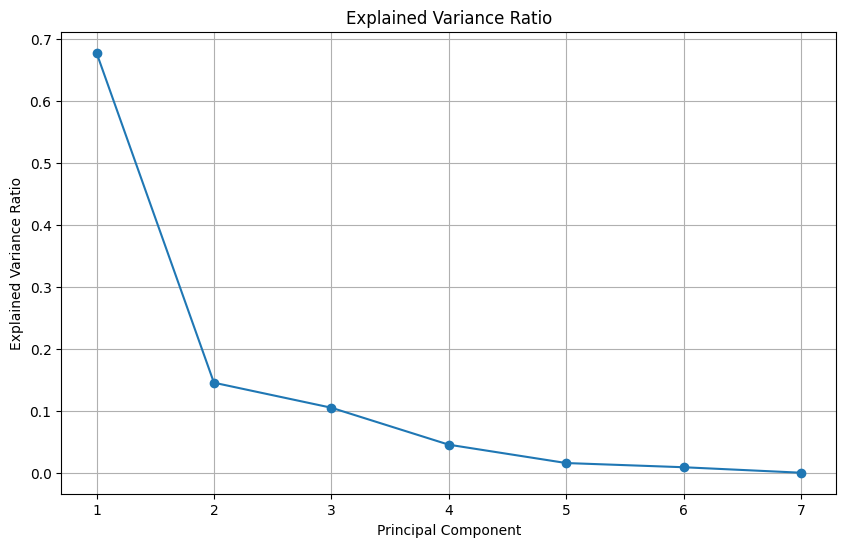

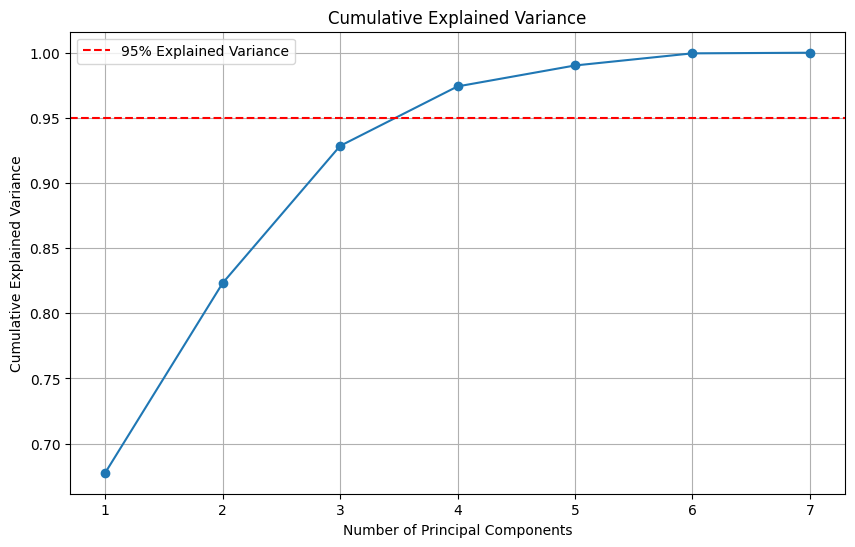

In [9]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()


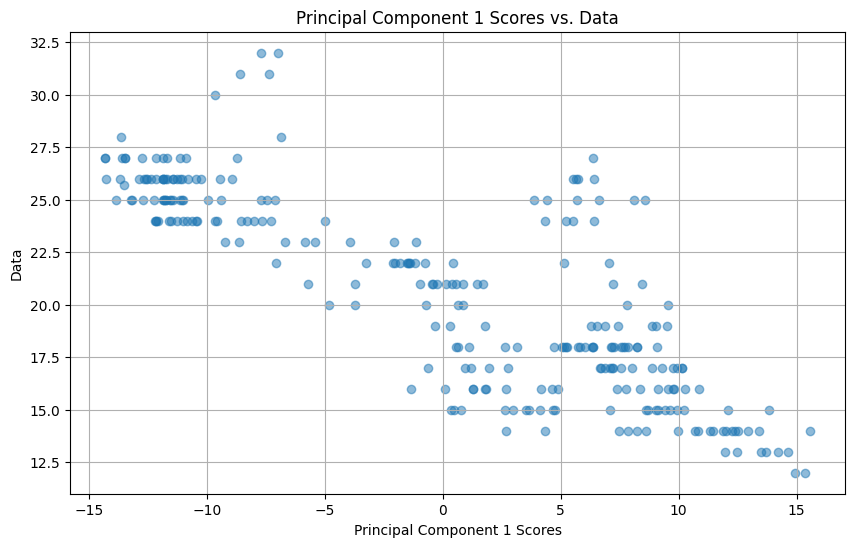

In [10]:
# Extract the first principal component scores
first_component_scores = final_result[:, 0]

# Plot the first principal component scores against data
plt.figure(figsize=(10, 6))
plt.scatter(first_component_scores, df.iloc[:, 0], alpha=0.5)
plt.title('Principal Component 1 Scores vs. Data')
plt.xlabel('Principal Component 1 Scores')
plt.ylabel('Data')
plt.grid(True)
plt.show()


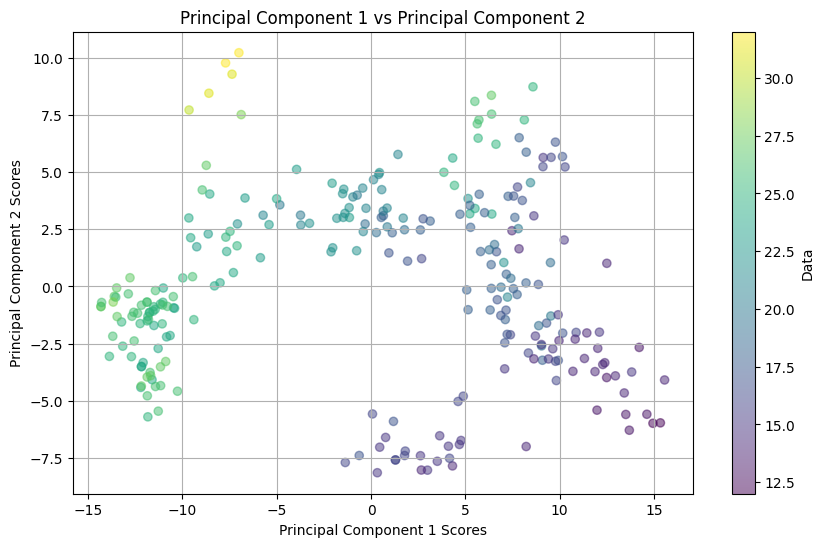

In [11]:
# Extract the first and second principal component scores
first_component_scores = final_result[:, 0]
second_component_scores = final_result[:, 1]

# Plot the first two principal component scores against data
plt.figure(figsize=(10, 6))
plt.scatter(first_component_scores, second_component_scores, c=df.iloc[:, 0], cmap='viridis', alpha=0.5)
plt.colorbar(label='Data') 
plt.title('Principal Component 1 vs Principal Component 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
